In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
news_df = pd.read_csv('/Users/amandashaffner/Downloads/final_en.csv')

In [3]:
news_df.head()

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1


In [4]:
news_df.columns = ['Headline', 'Body', 'Label']

news_df['Label'] = news_df['Label'].replace({1: True, 0: False})

news_df.head()

,Headline,Body,Label
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",True
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,True
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",False
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",True
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,True


In [5]:
news_df.isnull().sum()

Headline    0
Body        0
Label       0
dtype: int64

In [6]:
news_df.duplicated().sum()

270

In [7]:
#dropping duplicates

news_df = news_df.drop_duplicates()

news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9730 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  9730 non-null   object
 1   Body      9730 non-null   object
 2   Label     9730 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 237.5+ KB


In [8]:
news_df['Label'].unique()

array([ True, False])

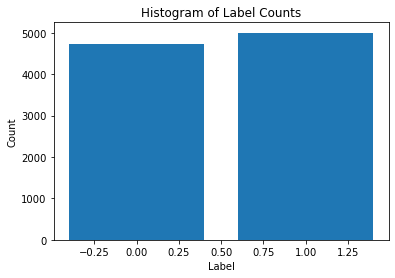

In [9]:
#Checking for abut even distribution of target feature

counts = news_df['Label'].value_counts()

plt.bar(counts.index , counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')
plt.show()


In [10]:
news_df['Label'].value_counts()/len(news_df) * 100

True     51.387461
False    48.612539
Name: Label, dtype: float64

In [11]:
#Visualizing features in Headlines

from wordcloud import WordCloud, STOPWORDS

all_text = ' '.join(news_df['Headline'])

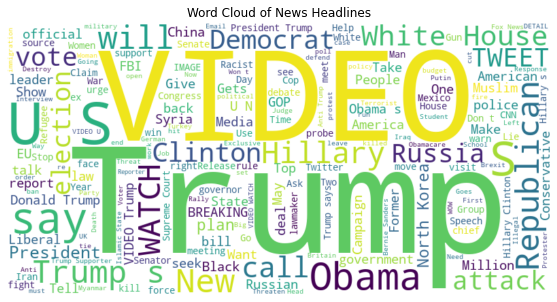

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

In [13]:
# Handle Missing Values (Replace NaN with an empty string) for 'Headline' and 'Body'
news_df['Headline'].fillna('', inplace=True)
news_df['Body'].fillna('', inplace=True)

# Vectorize Text Data using TF-IDF for 'Headline' and 'Body'
tfidf_vectorizer_headline = TfidfVectorizer(max_features=1000) 
tfidf_vectorizer_body = TfidfVectorizer(max_features=1000)  

X_headline = tfidf_vectorizer_headline.fit_transform(news_df['Headline']).toarray()
X_body = tfidf_vectorizer_body.fit_transform(news_df['Body']).toarray()

# Combine the individual feature vectors into a single feature matrix (X)
X = pd.concat([pd.DataFrame(X_headline), pd.DataFrame(X_body)], axis=1).values

# Keep 'Label' as the target variable (y)
y = news_df['Label'].values


In [14]:
X

array([[0.        , 0.        , 0.        , ..., 0.08829829, 0.        ,
        0.026423  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03792078, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11199216, 0.        ,
        0.04189164],
       [0.        , 0.        , 0.        , ..., 0.08648516, 0.        ,
        0.        ]])

In [15]:
#Split data into traning and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 7784
The number of observations in test set is 1946


In [16]:
#Base comparison for accuracy score using dummyclassifier

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5210688591983555

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

# Create and train the logistic regression model
lr = LogisticRegression(solver='lbfgs', random_state=42)
lr.fit(X_train, y_train)


# Print accuracy and interations
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy score: {:.2f}'.format(accuracy))
print('# of iterations %s' % lr.n_iter_[0])


Accuracy score: 0.99
# of iterations 37


In [18]:
# Evaluate the model's performance on the training data
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

report = classification_report(y_test, predictions, target_names=['True', 'False'])
print(report)

[[1006    8]
 [  17  915]]
              precision    recall  f1-score   support

        True       0.99      0.98      0.99       932
       False       0.98      0.99      0.99      1014

    accuracy                           0.99      1946
   macro avg       0.99      0.99      0.99      1946
weighted avg       0.99      0.99      0.99      1946



In [19]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

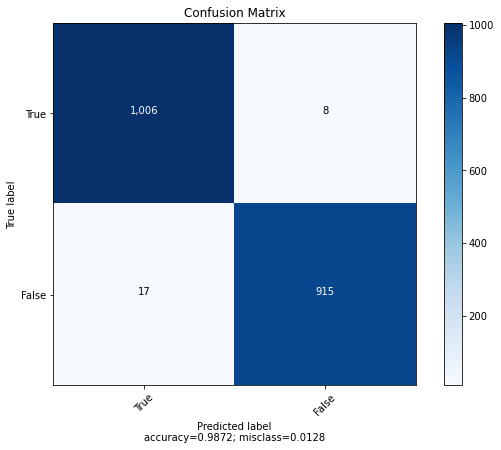

In [20]:
plot_confusion_matrix(cm=confusion, target_names = ['True', 'False'], title = 'Confusion Matrix',normalize=False)


In [21]:
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9922918807810894
Score on test data:  0.987153134635149


In [22]:
#Though model already has high acuracy score. Increaing penality to determine if any difference is made. 

lr = LogisticRegression(solver='lbfgs', C = 2, random_state=42)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

[[1008    6]
 [  12  920]]
Score on training data:  0.9953751284686536
Score on test data:  0.9907502569373073


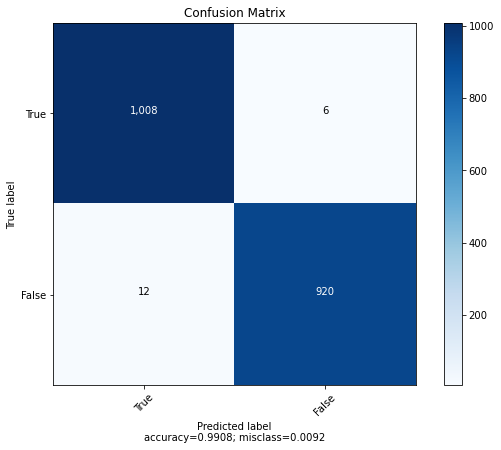

In [23]:
plot_confusion_matrix(cm=confusion, target_names = ['True', 'False'], title = 'Confusion Matrix',normalize=False)


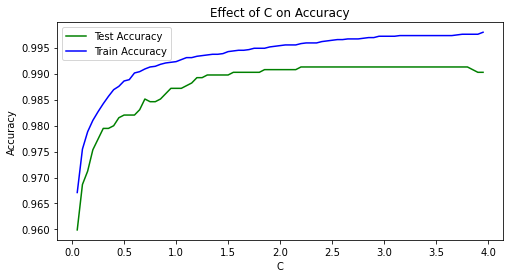

In [24]:
#Graph C values to further investigate if model can be tuned more. 

c_vals = np.arange(0.05, 4 , 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', C=c, max_iter=10000, random_state=42)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [25]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9902363823227133

In [26]:
#Cross-validation to ensure accuracy amoung sets. 

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=2, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.98920863 0.98406989 0.99075026 0.98818088 0.98972251]
Mean cross-validation score: 0.988


In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [28]:
predictions = decision_tree.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

[[1010    4]
 [   8  924]]
Score on training data:  0.9979445015416238
Score on test data:  0.9902363823227133


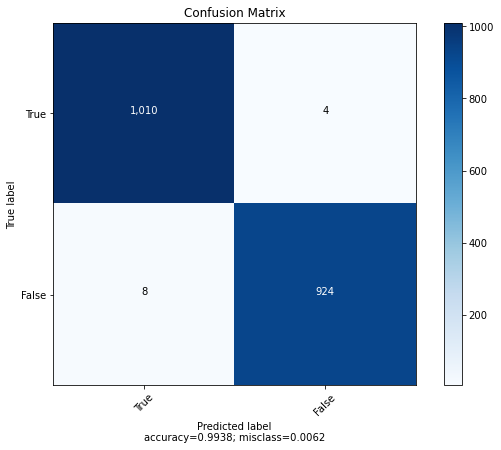

In [29]:
plot_confusion_matrix(cm=confusion, target_names = ['True', 'False'], title = 'Confusion Matrix',normalize=False)


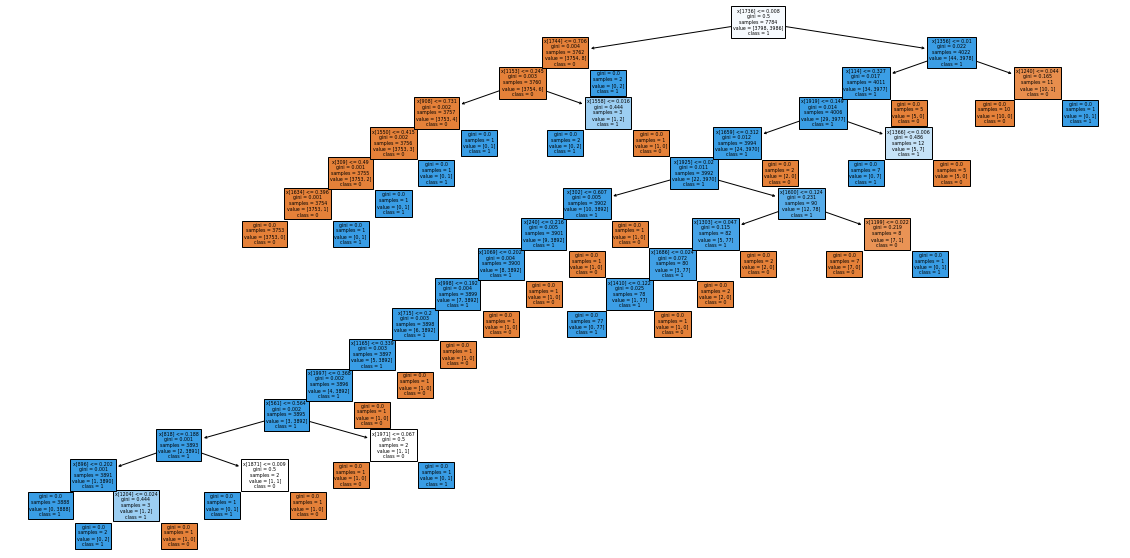

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  
plot_tree(decision_tree, class_names=['0', '1'], filled=True)
plt.show()

Both models above do an excellent jobs at classifying the target feature. Due to the similarity in acuracy scores, I chose to take a deeper look into the logitic regression to determine if any tuning could improve the model. I chose the logistic regression over the decision tree, due to the fact the the decision is rather large and accuracy could need to be sacrificed when pruning the tree. 